<a href="https://colab.research.google.com/github/Mj-Novoa/challenge1-data-science-latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [89]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [90]:
ingreso_total_tienda1 = tienda['Precio'].sum()
ingreso_total_tienda2 = tienda2['Precio'].sum()
ingreso_total_tienda3 = tienda3['Precio'].sum()
ingreso_total_tienda4 = tienda4['Precio'].sum()

print(f"Ingreso total Tienda 1: {ingreso_total_tienda1}")
print(f"Ingreso total Tienda 2: {ingreso_total_tienda2}")
print(f"Ingreso total Tienda 3: {ingreso_total_tienda3}")
print(f"Ingreso total Tienda 4: {ingreso_total_tienda4}")

Ingreso total Tienda 1: 1150880400.0
Ingreso total Tienda 2: 1116343500.0
Ingreso total Tienda 3: 1098019600.0
Ingreso total Tienda 4: 1038375700.0


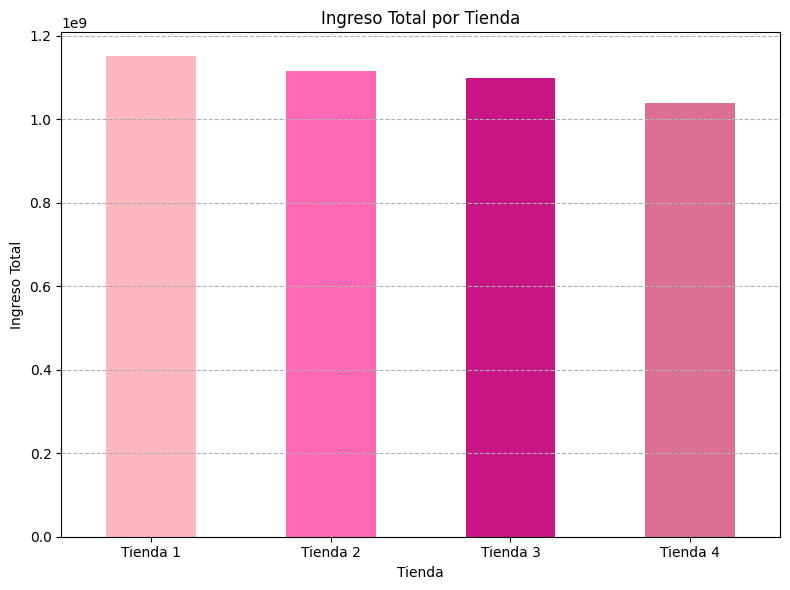

In [91]:
import matplotlib.pyplot as plt

ingresos_por_tienda = pd.Series({
    'Tienda 1': ingreso_total_tienda1,
    'Tienda 2': ingreso_total_tienda2,
    'Tienda 3': ingreso_total_tienda3,
    'Tienda 4': ingreso_total_tienda4
})

plt.figure(figsize=(8, 6))
ingresos_por_tienda.plot(kind='bar', color=['#FFB6C1', '#FF69B4', '#C71585', '#DB7093'])
plt.title('Ingreso Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso Total')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [92]:
tiendas_unificadas = pd.concat([tienda, tienda2, tienda3, tienda4], keys=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])

tiendas_unificadas = tiendas_unificadas.reset_index()

tiendas_unificadas = tiendas_unificadas.rename(columns={'level_0': 'Tienda'})

ventas_por_categoria = tiendas_unificadas.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad de Ventas')

for tienda_nombre in tiendas_unificadas['Tienda'].unique():
    print(f"\nCategorías más vendidas en {tienda_nombre}:")
    ventas_tienda = ventas_por_categoria[ventas_por_categoria['Tienda'] == tienda_nombre].sort_values(by='Cantidad de Ventas', ascending=False).reset_index(drop=True)
    display(ventas_tienda)


Categorías más vendidas en Tienda 1:


,Tienda,Categoría del Producto,Cantidad de Ventas
0,Tienda 1,Muebles,465
1,Tienda 1,Electrónicos,448
2,Tienda 1,Juguetes,324
3,Tienda 1,Electrodomésticos,312
4,Tienda 1,Deportes y diversión,284
5,Tienda 1,Instrumentos musicales,182
6,Tienda 1,Libros,173
7,Tienda 1,Artículos para el hogar,171



Categorías más vendidas en Tienda 2:


,Tienda,Categoría del Producto,Cantidad de Ventas
0,Tienda 2,Muebles,442
1,Tienda 2,Electrónicos,422
2,Tienda 2,Juguetes,313
3,Tienda 2,Electrodomésticos,305
4,Tienda 2,Deportes y diversión,275
5,Tienda 2,Instrumentos musicales,224
6,Tienda 2,Libros,197
7,Tienda 2,Artículos para el hogar,181



Categorías más vendidas en Tienda 3:


,Tienda,Categoría del Producto,Cantidad de Ventas
0,Tienda 3,Muebles,499
1,Tienda 3,Electrónicos,451
2,Tienda 3,Juguetes,315
3,Tienda 3,Electrodomésticos,278
4,Tienda 3,Deportes y diversión,277
5,Tienda 3,Libros,185
6,Tienda 3,Artículos para el hogar,177
7,Tienda 3,Instrumentos musicales,177



Categorías más vendidas en Tienda 4:


,Tienda,Categoría del Producto,Cantidad de Ventas
0,Tienda 4,Muebles,480
1,Tienda 4,Electrónicos,451
2,Tienda 4,Juguetes,338
3,Tienda 4,Deportes y diversión,277
4,Tienda 4,Electrodomésticos,254
5,Tienda 4,Artículos para el hogar,201
6,Tienda 4,Libros,187
7,Tienda 4,Instrumentos musicales,170


In [93]:
categorias_tienda = tienda['Categoría del Producto'].value_counts()
categorias_tienda2 = tienda2['Categoría del Producto'].value_counts()
categorias_tienda3 = tienda3['Categoría del Producto'].value_counts()
categorias_tienda4 = tienda4['Categoría del Producto'].value_counts()

mejores_categorias = categorias_tienda[categorias_tienda == categorias_tienda.max()]
mejores_categorias2 = categorias_tienda2[categorias_tienda2 == categorias_tienda2.max()]
mejores_categorias3 = categorias_tienda3[categorias_tienda3 == categorias_tienda3.max()]
mejores_categorias4 = categorias_tienda4[categorias_tienda4 == categorias_tienda4.max()]

print(f"Categorías más populares en la tienda 1: {', '.join(mejores_categorias.index.tolist())}")
print(f"Categorías más populares en la tienda 2: {', '.join(mejores_categorias2.index.tolist())}")
print(f"Categorías más populares en la tienda 3: {', '.join(mejores_categorias3.index.tolist())}")
print(f"Categorías más populares en la tienda 4: {', '.join(mejores_categorias4.index.tolist())}")


Categorías más populares en la tienda 1: Muebles
Categorías más populares en la tienda 2: Muebles
Categorías más populares en la tienda 3: Muebles
Categorías más populares en la tienda 4: Muebles


# 3. Calificación promedio de la tienda


In [103]:
calificacion_promedio_tienda1 = tienda['Calificación'].mean()
calificacion_promedio_tienda2 = tienda2['Calificación'].mean()
calificacion_promedio_tienda3 = tienda3['Calificación'].mean()
calificacion_promedio_tienda4 = tienda4['Calificación'].mean()

print(f"Calificación promedio Tienda 1: {calificacion_promedio_tienda1:.2f}")
print(f"Calificación promedio Tienda 2: {calificacion_promedio_tienda2:.2f}")
print(f"Calificación promedio Tienda 3: {calificacion_promedio_tienda3:.2f}")
print(f"Calificación promedio Tienda 4: {calificacion_promedio_tienda4:.2f}")

Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


In [104]:
calificacion_promedio_por_categoria = tiendas_unificadas.groupby('Categoría del Producto')['Calificación'].mean().reset_index()
calificacion_promedio_por_categoria = calificacion_promedio_por_categoria.rename(columns={'Calificación': 'Calificación Promedio'})

calificacion_promedio_por_categoria = calificacion_promedio_por_categoria.sort_values(by='Calificación Promedio', ascending=False)

print("Calificación promedio de los clientes por categoría (ordenado de mayor a menor):")
display(calificacion_promedio_por_categoria)

Calificación promedio de los clientes por categoría (ordenado de mayor a menor):


,Categoría del Producto,Calificación Promedio
5,Juguetes,4.070543
7,Muebles,4.033934
2,Electrodomésticos,4.014795
6,Libros,4.004043
4,Instrumentos musicales,4.003984
3,Electrónicos,3.992664
1,Deportes y diversión,3.988320
0,Artículos para el hogar,3.979452


In [108]:
calificacion_promedio_por_producto = tiendas_unificadas.groupby('Producto')['Calificación'].mean().reset_index()
calificacion_promedio_por_producto = calificacion_promedio_por_producto.rename(columns={'Calificación': 'Calificación Promedio'})

calificacion_promedio_por_producto = calificacion_promedio_por_producto.sort_values(by='Calificación Promedio', ascending=False)

print("Calificación promedio de los clientes por producto (ordenado de mayor a menor):")
display(calificacion_promedio_por_producto)

Calificación promedio de los clientes por producto (ordenado de mayor a menor):


,Producto,Calificación Promedio
23,Impresora,4.239362
26,Juego de mesa,4.217143
44,Sillón,4.178571
39,Refrigerador,4.162304
24,Iniciando en programación,4.133333
7,Batería,4.133005
9,Bloques de construcción,4.110553
27,Kit de bancas,4.106383
0,Ajedrez de madera,4.105556
12,Carrito de control remoto,4.097087


# 4. Productos más y menos vendidos

In [129]:
import pandas as pd


tabla_productos_extremos = pd.DataFrame([
    {
        'Tienda': tienda,
        'Categoria': tipo,
        'Producto': datos['Producto'],
        'Cantidad de Ventas': datos['Cantidad de Ventas']
    }
    for tienda, productos in productos_mas_menos_vendidos_por_tienda.items()
    for tipo, datos in productos.items()
])


for tienda, df in tabla_productos_extremos.groupby('Tienda'):
    print(f"\n📍 {tienda}")
    display(df.reset_index(drop=True))



📍 Tienda 1


,Tienda,Categoria,Producto,Cantidad de Ventas
0,Tienda 1,Más Vendido,Armario,60
1,Tienda 1,Menos Vendido,Auriculares con micrófono,33



📍 Tienda 2


,Tienda,Categoria,Producto,Cantidad de Ventas
0,Tienda 2,Más Vendido,Iniciando en programación,65
1,Tienda 2,Menos Vendido,Juego de mesa,32



📍 Tienda 3


,Tienda,Categoria,Producto,Cantidad de Ventas
0,Tienda 3,Más Vendido,Kit de bancas,57
1,Tienda 3,Menos Vendido,Bloques de construcción,35



📍 Tienda 4


,Tienda,Categoria,Producto,Cantidad de Ventas
0,Tienda 4,Más Vendido,Cama box,62
1,Tienda 4,Menos Vendido,Guitarra eléctrica,33


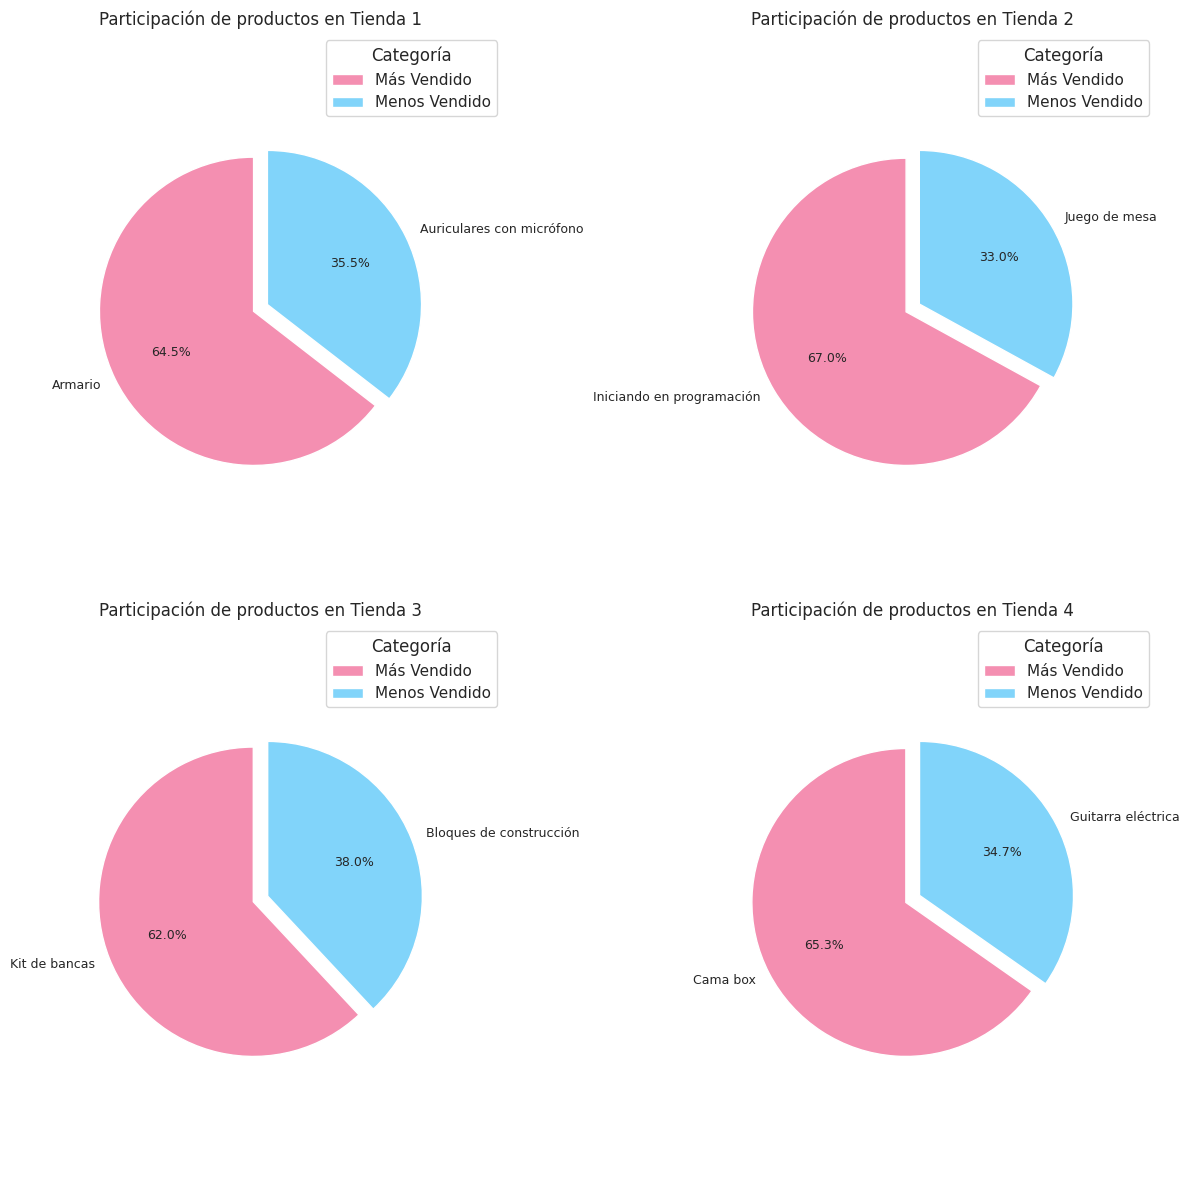

In [150]:
import matplotlib.pyplot as plt

# Colores para cada categoría
color_map = {'Más Vendido': '#f48fb1', 'Menos Vendido': '#81d4fa'}

# Preparar lista de tiendas
tiendas = tabla_productos_extremos['Tienda'].unique()
num_tiendas = len(tiendas)
cols = 2
rows = (num_tiendas + 1) // 2

# Crear figura
fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))
axes = axes.flatten()  # Aplanar para iterar fácilmente

# Graficar cada tienda
for i, tienda in enumerate(tiendas):
    ax = axes[i]
    df_tienda = tabla_productos_extremos[tabla_productos_extremos['Tienda'] == tienda]

    labels = df_tienda['Producto']
    sizes = df_tienda['Cantidad de Ventas']
    categorias = df_tienda['Categoria']
    colors = [color_map[cat] for cat in categorias]
    explode = [0.05] * len(labels)

    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        explode=explode,
        textprops={'fontsize': 9}
    )

    ax.set_title(f'Participación de productos en {tienda}', fontsize=12)
    ax.axis('equal')

    # Leyenda
    ax.legend(
        wedges,
        categorias,
        title='Categoría',
        loc='upper right',
        bbox_to_anchor=(1.2, 1)
    )


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda